## Libraries

In [2]:
import yfinance as yf
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
# pd.options.plotting.backend = "plotly"
import numpy as np
import boto3
from io import StringIO
from sagemaker import get_execution_role
import warnings
warnings.filterwarnings("ignore")
import pickle

Matplotlib is building the font cache; this may take a moment.


In [3]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

## Functions

In [3]:
# Function to save a .csv in S3 from a DataFrame of our SageMaker python notebook
def _write_dataframe_to_csv_on_s3(DESTINATION, dataframe, filename):
    """ Write a dataframe to a CSV on S3 """
    print(
        "Writing {} records to '{}' in bucket '{}'.".format(
            len(dataframe), filename, DESTINATION
        )
    )
    # Create buffer
    csv_buffer = StringIO()
    # Write dataframe to buffer
    dataframe.to_csv(csv_buffer, sep=",", index=True)
    # Create S3 object
    s3_resource = boto3.resource("s3")
    # Write buffer to S3 object
    s3_resource.Object(DESTINATION, filename).put(Body=csv_buffer.getvalue())

## How to use yfinance library

### Get ticker info

In [4]:
mystock = "MC.PA" # LVMH Moët Hennessy - Louis Vuitton, Société Européenne
myticker = yf.Ticker(mystock)

In [5]:
print(myticker.info)

{'zip': '75008', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 148343, 'longBusinessSummary': "LVMH MoÃ«t Hennessy - Louis Vuitton, SociÃ©tÃ© EuropÃ©enne operates as a luxury products company. The company offers champagnes, wines, and spirits under the Ao Yun, Ardbeg, Belvedere, Bodega Numanthia, Cape Mentelle, Chandon, ChÃ¢teau Cheval Blanc, ChÃ¢teau d'Yquem, Cheval des Andes, Clos des Lambrays, Clos19, Cloudy Bay, Dom PÃ©rignon, Glenmorangie, Hennessy, Krug, Mercier, MoÃ«t & Chandon, Newton, Vineyard, Ruinart, Terrazas de los Andes, Veuve Clicquot, Volcan de mi Tierra, and Woodinville brands. It also provides fashion and leather products under the Berluti, Celine, Christian Dior, Emilio Pucci, Fendi, Givenchy, Kenzo, Loewe, Loro Piana, Louis Vuitton, Marc Jacobs, Moynat, Nicholas Kirkwood, Pink Shirtmaker, and Rimowa brands. In addition, the company offers perfumes and cosmetics under the Acqua di Parma, Benefit Cosmetics, Fenty Beauty by Rihanna, Fresh, Parfums Givenchy, Guerl

In [6]:
# for key in myticker.info:
#     print(key)

# print(myticker.info["longName"])
# print(myticker.info["sector"])
# print(myticker.info["industry"])

In [7]:
# mytickers = yf.Tickers(["MC.PA", "RDSA.AS"])

In [8]:
# for ticker in mytickers.tickers:
#     print(mytickers.tickers[ticker].info["longName"])

### Parameters for the history function

### Get history of a stock

In [9]:
# hist = myticker.history(period="1y") # check docs for parameters

In [10]:
# hist.head()

In [11]:
# hist["Close"].plot(figsize=(16,9), grid=True, title=f"{mystock}\n{myticker.info['longName']}") # without Plotly backend

In [12]:
# hist["Close"].plot()
# px.line(hist["Close"])

### yf.download function

In [13]:
# Stocks comprising the euronext 100
euronext100 = ['KBC.BR', 'JMT.LS', 'BNP.PA', 'BN.PA', 'GBLB.BR', 'KN.PA', 'AGS.BR', 'LR.PA', 'MC.PA', 'ABI.BR', 'EDEN.PA', 'RDSA.AS', 'OR.PA', 'CAP.PA', 'SAN.PA', 'GALP.LS', 'SW.PA', 'INGA.AS', 'KER.PA', 'PHIA.AS', 'ATO.PA', 'ILD.PA', 'COV.PA', 'AIR.PA', 'AC.PA', 'TEP.PA', 'UBI.PA', 'ASML.AS', 'RAND.AS', 'VIE.PA']

# All stocks on Euronext Paris, Amsterdam & Brussels
euronext_pab = ['2CRSI.PA', '2MX.PA', 'ASP.PA', 'AALB.AS', 'ABI.BR', 'AB.PA', 'ABCA.PA', 'ABEO.PA', 'ABNX.PA', 'ABVX.PA', 'ABN.AS', 'ABO.BR', 'ACPH.BR', 'ACAN.PA', 'ACCEL.AS', 'ACCB.BR', 'AC.PA', 'ACNV.PA', 'AXS.AS', 'ACKB.BR', 'EOS.PA', 'ATI.PA', 'ALDV.PA', 'ALP.PA', 'ADOC.PA', 'ADP.PA', 'ADUX.PA', 'ADV.PA', 'ADVIC.PA', 'ADVI.PA', 'ADYEN.AS', 'AED.BR', 'AGN.AS', 'AKOM.PA', 'AGS.BR', 'AGFB.BR', 'AD.AS', 'AF.PA', 'AI.PA', 'AIR.PA', 'AJAX.AS', 'AKA.PA', 'AKW.PA', 'AKZA.AS', 'AAA.PA', 'ABIO.PA', 'ALD.PA', 'ALFEN.AS', 'CDANV.PA', 'CDA.PA', 'ALM.PA', 'ALO.PA', 'ALONV.PA', 'LTA.PA', 'ALTA.PA', 'AREIT.PA', 'ATE.PA', 'ALTUR.PA', 'ALX.AS', 'AMG.AS', 'AMPLI.PA', 'ACOMO.AS', 'AMUN.PA', 'APAM.AS', 'APM.PA', 'ARCAD.AS', 'MT.AS', 'ARG.PA', 'ARGX.BR', 'AKE.PA', 'ARTE.PA', 'PRC.PA', 'ARTO.PA', 'ASC.BR', 'ASIT.BR', 'ASM.AS', 'ASML.AS', 'ASRNL.AS', 'ASY.PA', 'ATA.PA', 'ATEME.PA', 'ATEB.BR', 'ATO.PA', 'ATRS.AS', 'AUB.PA', 'AUGR.PA', 'AURE.PA', 'AURS.PA', 'AVTX.AS', 'AVT.PA', 'CS.PA', 'CSNV.PA', 'AXW.PA', 'BSGR.AS', 'BCRA.PA', 'BAIN.PA', 'BALTA.BR', 'BALYO.PA', 'BAMNB.AS', 'BANI.BR', 'BUI.PA', 'BAR.BR', 'BFIT.AS', 'BASS.PA', 'BLC.PA', 'BESI.AS', 'BEFB.BR', 'BEKB.BR', 'FBEL.PA', 'BELR.BR', 'BELU.BR', 'BEN.PA', 'BBED.AS', 'BEVER.AS', 'BB.PA', 'BIG.PA', 'BCART.BR', 'BIM.PA', 'BLEE.PA', 'BNP.PA', 'BOI.PA', 'BOL.PA', 'BOLNV.PA', 'BON.PA', 'BOTHE.BR', 'BOOST.PA', 'BOKA.AS', 'BSD.PA', 'BGHL.AS', 'BGHS.AS', 'EN.PA', 'ENNV.PA', 'BPOST.BR', 'BNB.BR', 'BREB.BR', 'BRILL.AS', 'BRNL.AS', 'BVI.PA', 'BUR.PA', 'CAT31.PA', 'CAFO.PA', 'CBDG.PA', 'CAMB.BR', 'CAPLI.PA', 'CAP.PA', 'CPINV.BR', 'CARM.PA', 'CARP.PA', 'CA.PA', 'CO.PA', 'CAS.PA', 'CATG.PA', 'CTRG.PA', 'CATR.PA', 'CBOT.PA', 'CGM.PA', 'CGR.PA', 'CYAD.BR', 'CENER.BR', 'CFEB.BR', 'CFI.PA', 'CGG.PA', 'CRI.PA', 'CHSR.PA', 'CDI.PA', 'CIB.PA', 'COMB.BR', 'CLA.PA', 'CMCOM.AS', 'COM.PA', 'CNV.PA', 'CNP.PA', 'CCEP.AS', 'COFA.PA', 'COFB.BR', 'COH.PA', 'RE.PA', 'COLR.BR', 'CRBN.AS', 'CLB.AS', 'COUR.PA', 'COV.PA', 'COVH.PA', 'CRAP.PA', 'CRAV.PA', 'CRBP2.PA', 'CIV.PA', 'CRLA.PA', 'CRLO.PA', 'CMO.PA', 'CNF.PA', 'CCN.PA', 'CAF.PA', 'CRSU.PA', 'CRTO.PA', 'ACA.PA', 'OPTI.BR', 'CROS.PA', 'SX.PA', 'CTAC.AS', 'CTPNV.AS', 'CLEX.BR', 'DIE.BR', 'BN.PA', 'AM.PA', 'DSYNV.PA', 'DSY.PA', 'DBV.PA', 'DECB.BR', 'DLTA.PA', 'DBG.PA', 'DVT.PA', 'DGB.AS', 'DGE.PA', 'DGM.PA', 'DPAM.PA', 'DPA.AS', 'DSC2.AS', 'DSC2S.AS', 'DSM.AS', 'EAS2P.AS', 'ECONB.BR', 'EDEN.PA', 'EDF.PA', 'EFIC1.AS', 'EFICT.AS', 'GID.PA', 'FGR.PA', 'EKI.PA', 'EKOP.BR', 'ELEC.PA', 'EEM.PA', 'ELI.BR', 'ELIOR.PA', 'ELIS.PA', 'ENGI.PA', 'EPS.PA', 'ENVI.AS', 'EOSI.PA', 'ERA.PA', 'ERYP.PA', 'ESG.AS', 'ESGT.AS', 'ESI.PA', 'ESP.AS', 'ELNV.PA', 'EL.PA', 'ES.PA', 'EFI.PA', 'RF.PA', 'EUR.PA', 'ECT.AS', 'ECMPA.AS', 'ERFNV.PA', 'ERF.PA', 'EURN.BR', 'ENX.PA', 'ECP.PA', 'EUCAR.PA', 'ETL.PA', 'EGR.PA', 'EVS.BR', 'EXAC.PA', 'EXE.PA', 'EXM.BR', 'EPCP.PA', 'EXPL.PA', 'FAGR.BR', 'FAST.AS', 'EO.PA', 'FAUV.PA', 'FAYE.PA', 'FDJ.PA', 'FCMC.PA', 'FALG.PA', 'SACI.PA', 'ORIA.PA', 'FGA.PA', 'BERR.PA', 'EBPF.PA', 'FOAF.PA', 'FINM.PA', 'ODET.PA', 'FNTS.PA', 'FIPP.PA', 'FLOB.BR', 'FLOW.AS', 'FLUX.BR', 'FNAC.PA', 'FNG.BR', 'FPN.PA', 'LEBL.PA', 'FATL.PA', 'EURS.PA', 'INEA.PA', 'FLY.PA', 'SPEL.PA', 'FORE.PA', 'FFARM.AS', 'FOU.BR', 'LFDE.PA', 'FREY.PA', 'FUR.AS', 'GLPG.AS', 'GALIM.PA', 'GAM.PA', 'GBLB.BR', 'GEA.PA', 'GFC.PA', 'GNE.PA', 'GENX.PA', 'GNRO.PA', 'GNFT.PA', 'GKTX.PA', 'GV.PA', 'SIGHT.PA', 'GOJXN.AS', 'GET.PA', 'GIMB.BR', 'GLO.PA', 'GLOG.BR', 'GPE.PA', 'GRVO.PA', 'GVNV.AS', 'GREEN.BR', 'CEN.PA', 'FLO.PA', 'GOE.PA', 'IRD.PA', 'GJAJ.PA', 'OPN.PA', 'PARP.PA', 'SFPI.PA', 'GTBP.PA', 'GTT.PA', 'GBT.PA', 'GBTNV.PA', 'GUI.PA', 'HAL.AS', 'HAMO.BR', 'PIG.PA', 'HEIJM.AS', 'HEIA.AS', 'HEIO.AS', 'RMS.PA', 'HEXA.PA', 'HF.PA', 'HCO.PA', 'HIPAY.PA', 'HOLCO.AS', 'HOMI.BR', 'HOP.PA', 'HDP.PA', 'HDG.AS', 'HUNDP.AS', 'HYDRA.AS', 'HYL.BR', 'IBAB.BR', 'ICAD.PA', 'ICT.AS', 'IDL.PA', 'IDIP.PA', 'IEP.BR', 'IEX.AS', 'IGE.PA', 'ILD.PA', 'IMCD.AS', 'NK.PA', 'IMMOU.BR', 'IMDA.PA', 'IMMO.BR', 'INCLU.BR', 'INFE.PA', 'INF.PA', 'INGA.AS', 'IPH.PA', 'INPST.AS', 'ITP.PA', 'INTER.AS', 'INTO.BR', 'ITXT.PA', 'IVA.PA', 'IPN.PA', 'IPS.PA', 'IPSNV.PA', 'ITE.PA', 'JBOG.PA', 'JCQ.PA', 'DEC.PA', 'JDEP.AS', 'JEN.BR', 'TKWY.AS', 'KOF.PA', 'KBC.BR', 'KBCA.BR', 'KENDR.AS', 'KER.PA', 'KEYW.BR', 'KDS.AS', 'KIN.BR', 'LI.PA', 'KORI.PA', 'KPN.AS', 'OR.PA', 'ORNV.PA', 'LACR.PA', 'LHN.PA', 'MMB.PA', 'LAT.PA', 'LPE.PA', 'LVIDE.AS', 'LOUP.PA', 'LEAS.BR', 'LBON.PA', 'LSS.PA', 'LSSNV.PA', 'LR.PA', 'LIN.PA', 'FII.PA', 'LNA.PA', 'LOTB.BR', 'BOLS.AS', 'LBIRD.PA', 'MC.PA', 'LYS.PA', 'MRM.PA', 'MDM.PA', 'MALT.PA', 'MTU.PA', 'MAN.PA', 'MAREL.AS', 'IAM.PA', 'MKEA.PA', 'MAU.PA', 'MBWS.PA', 'MCPHY.PA', 'MDXH.BR', 'EDI.PA', 'MEDCL.PA', 'MELE.BR', 'MEMS.PA', 'MERY.PA', 'MRK.PA', 'MRN.PA', 'MRNNV.PA', 'METEX.PA', 'MMT.PA', 'ML.PA', 'MLNV.PA', 'MUN.PA', 'MIKO.BR', 'MITRA.BR', 'NEDSE.AS', 'MONC.PA', 'MONT.BR', 'MOP.BR', 'MOPF.BR', 'MORE.AS', 'MOUR.BR', 'GREV.PA', 'NACON.PA', 'NANO.PA', 'KN.PA', 'NAVYA.PA', 'NEDAP.AS', 'NEOEN.PA', 'NRP.AS', 'NRO.PA', 'NSE.AS', 'NEWAY.AS', 'NEX.PA', 'NXI.PA', 'NEXTS.PA', 'COX.PA', 'NN.AS', 'NOKIA.PA', 'NOVI.AS', 'NR21.PA', 'NRG.PA', 'NSI.AS', 'NYR.BR', 'NYXH.BR', 'OCI.AS', 'SBT.PA', 'OLG.PA', 'ONTEX.BR', 'ORA.PA', 'OBEL.BR', 'ORANW.AS', 'ORAP.PA', 'KAZI.PA', 'ORDI.AS', 'OREGE.PA', 'ORP.PA', 'OSE.PA', 'OXUR.BR', 'PID.PA', 'PAR.PA', 'PARRO.PA', 'PSAT.PA', 'PAT.PA', 'PAY.BR', 'PCA.PA', 'RI.PA', 'PERR.PA', 'PSH.AS', 'PEUG.PA', 'PHA.PA', 'PHARM.AS', 'INPHI.AS', 'PHIA.AS', 'PIC.BR', 'VAC.PA', 'PVL.PA', 'POM.PA', 'PORF.AS', 'PNL.AS', 'POXEL.PA', 'PPLAA.AS', 'PPLAB.AS', 'PPLA.AS', 'PREC.PA', 'PROAC.PA', 'PWG.PA', 'PROL.PA', 'PRX.AS', 'PROX.BR', 'PSB.PA', 'PUB.PA', 'QRF.BR', 'QDT.PA', 'QFG.BR', 'RAL.PA', 'GDS.PA', 'RAND.AS', 'REC.BR', 'RX.PA', 'REINA.AS', 'REN.AS', 'RCO.PA', 'RNO.PA', 'RWI.AS', 'RES.BR', 'RET.BR', 'RXL.PA', 'RBT.PA', 'CBR.PA', 'CBE.PA', 'RBO.PA', 'ROOD.AS', 'ENGB.BR', 'ROTH.PA', 'ROU.BR', 'RDSA.AS', 'RDSB.AS', 'RUI.PA', 'SK.PA', 'SAF.PA', 'SGO.PA', 'SGONV.PA', 'SABE.PA', 'SAMS.PA', 'SAN.PA', 'SANNV.PA', 'DIM.PA', 'SAVE.PA', 'SBMO.AS', 'CBSM.PA', 'SCHD.BR', 'SLB.PA', 'SU.PA', 'SCR.PA', 'SCHP.PA', 'SGRO.PA', 'SLCO.PA', 'SELER.PA', 'SEQUA.BR', 'SEFER.PA', 'SESG.PA', 'SESL.PA', 'SRP.PA', 'SHUR.BR', 'SIFG.AS', 'GIRO.PA', 'LIGHT.AS', 'SII.PA', 'SIOE.BR', 'SIP.BR', 'SLIGR.AS', 'SMAR.BR', 'SMCP.PA', 'SMTPC.PA', 'SNOW.AS', 'SFCA.PA', 'GLE.PA', 'SW.PA', 'SEC.PA', 'SOF.BR', 'SOG.PA', 'SOI.PA', 'LOCAL.PA', 'S30.PA', 'SOLV.BR', 'SOLB.BR', 'SO.PA', 'SOP.PA', 'SPA.BR', 'SPIE.PA', 'SQI.PA', 'DPT.PA', 'STF.PA', 'STLA.PA', 'STRN.AS', 'STM.PA', 'SEV.PA', 'SWP.PA', 'SDG.PA', 'TKTT.PA', 'TAYN.PA', 'TCH.PA', 'TE.PA', 'FTI.PA', 'TNET.BR', 'TEP.PA', 'TVRB.PA', 'TERB.BR', 'TESB.BR', 'TES.PA', 'TFG.AS', 'TEXF.BR', 'TFI.PA', 'TFF.PA', 'HO.PA', 'HONV.PA', 'THEP.PA', 'TBIRD.AS', 'TIE.AS', 'TKO.PA', 'TINC.BR', 'TIPI.PA', 'TITC.BR', 'TWEKA.AS', 'TOM2.AS', 'FP.PA', 'EC.PA', 'TOUP.PA', 'EIFF.PA', 'TNG.PA', 'TRI.PA', 'TUB.BR', 'UBI.PA', 'UCB.BR', 'UMI.BR', 'URW.AS', 'UNBL.PA', 'UPG.BR', 'UNA.AS', 'UFF.PA', 'FPG.PA', 'VLK.AS', 'FR.PA', 'VK.PA', 'VLA.PA', 'VALUE.AS', 'PREVA.AS', 'VAN.BR', 'VASTN.AS', 'VASTB.BR', 'VIE.PA', 'VEON.AS', 'VRLA.PA', 'VMX.PA', 'VETO.PA', 'VGP.BR', 'VCT.PA', 'VDLO.PA', 'VIL.PA', 'RIN.PA', 'DG.PA', 'VIO.BR', 'VIRP.PA', 'SDT.PA', 'VIV.PA', 'VIVNV.PA', 'VVY.AS', 'VTA.AS', 'VLTSA.PA', 'VPK.AS', 'VRAP.PA', 'WEB.BR', 'WAVE.PA', 'WDP.BR', 'MF.PA', 'WHA.AS', 'WEHB.BR', 'WKL.AS', 'WLN.PA', 'XFAB.PA', 'XIL.PA', 'XIOR.BR', 'XPO.PA', 'YATRA.AS', 'CV.PA', 'ZENT.BR']

mystocks = euronext_pab


In [14]:
# ?yf.download

In [15]:
# Pull closing prices and volumes. Check docs for all parameters
data = yf.download(
    tickers=mystocks,
    period="2y",
    interval="1wk",
)[["Close", "Volume"]]

[*********************100%***********************]  704 of 704 completed

13 Failed downloads:
- DSC2S.AS: No data found, symbol may be delisted
- BOLNV.PA: No data found, symbol may be delisted
- ELNV.PA: No data found, symbol may be delisted
- EFICT.AS: No data found, symbol may be delisted
- CV.PA: No data found, symbol may be delisted
- ESGT.AS: No data found, symbol may be delisted
- CDANV.PA: No data found, symbol may be delisted
- VIVNV.PA: No data found, symbol may be delisted
- ORNV.PA: No data found, symbol may be delisted
- BGHS.AS: No data found, symbol may be delisted
- LSSNV.PA: No data found, symbol may be delisted
- DSYNV.PA: No data found, symbol may be delisted
- SGONV.PA: No data found for this date range, symbol may be delisted


In [16]:
# Plot example of closing prices
# mystock = "GBLB.BR"
# data["Close"][mystock].plot(figsize=(10,5), grid=True, title=mystock)

In [17]:
# Store volumes in separate dataframe
df_volumes = data["Volume"]
df_volumes = df_volumes[mystocks]

In [18]:
df_volumes

,2CRSI.PA,2MX.PA,ASP.PA,AALB.AS,ABI.BR,AB.PA,ABCA.PA,ABEO.PA,ABNX.PA,ABVX.PA,...,WEHB.BR,WKL.AS,WLN.PA,XFAB.PA,XIL.PA,XIOR.BR,XPO.PA,YATRA.AS,CV.PA,ZENT.BR
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-15,49070.0,NaN,21399.0,1537827.0,5926042.0,585559.0,228747.0,4362.0,988298.0,20577.0,...,3652.0,1683603.0,419842.0,212734.0,43406.0,24892.0,196.0,0.0,NaN,1703.0
2019-04-22,46633.0,NaN,88738.0,1733081.0,6652486.0,189199.0,112395.0,8156.0,407058.0,15749.0,...,7930.0,2816561.0,1327600.0,243713.0,19454.0,41123.0,467.0,200.0,NaN,2435.0
2019-04-29,36912.0,NaN,115912.0,1183968.0,5724515.0,189290.0,127780.0,10632.0,2119823.0,81023.0,...,272512.0,2120593.0,5183259.0,193637.0,29377.0,51022.0,362.0,1780.0,NaN,2469.0
2019-05-06,30423.0,NaN,150223.0,1724895.0,8949530.0,203250.0,167687.0,11228.0,5221920.0,35272.0,...,6384.0,3758539.0,3777967.0,332590.0,28268.0,45839.0,84.0,200.0,NaN,3554.0
2019-05-13,43753.0,NaN,68724.0,1650701.0,8651371.0,256910.0,102207.0,6547.0,3614604.0,49582.0,...,10849.0,3836510.0,2404820.0,286095.0,37568.0,53712.0,166.0,0.0,NaN,1819.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-05,145398.0,111659.0,35981.0,950164.0,5490563.0,747556.0,358212.0,31788.0,1049637.0,163151.0,...,26989.0,2115554.0,2437077.0,1109964.0,31616.0,63645.0,0.0,525.0,NaN,644.0
2021-04-12,434361.0,15572.0,50455.0,633059.0,6570795.0,484172.0,384346.0,26200.0,327179.0,69471.0,...,29324.0,1948003.0,2317387.0,650521.0,18921.0,100454.0,NaN,7317.0,NaN,1989.0


In [19]:
# Calculate price change from base and store in separate dataframe
df_pc_pricechange = (data["Close"]/data["Close"].iloc[0] - 1) * 100
df_pc_pricechange = df_pc_pricechange[mystocks]

In [20]:
df_pc_pricechange.head()

,2CRSI.PA,2MX.PA,ASP.PA,AALB.AS,ABI.BR,AB.PA,ABCA.PA,ABEO.PA,ABNX.PA,ABVX.PA,...,WEHB.BR,WKL.AS,WLN.PA,XFAB.PA,XIL.PA,XIOR.BR,XPO.PA,YATRA.AS,CV.PA,ZENT.BR
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-15,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
2019-04-22,5.708245,NaN,-2.757800,-0.941786,-1.953905,3.493447,-0.602409,-6.363638,4.237284,-2.859960,...,-4.054061,-0.608002,3.502307,0.000000,2.395957,-2.964645,-4.794521,9.999997,NaN,3.225806
2019-04-29,3.805493,NaN,-1.798568,-1.512564,-1.265023,1.091707,-2.710841,-9.090909,7.062149,-0.197243,...,-5.405409,-1.791998,0.276501,-1.834861,-2.269865,-4.104900,-4.109589,11.764701,NaN,-0.645164
2019-05-06,-1.057086,NaN,-5.635495,-7.477177,-7.176849,-3.165939,-4.066265,-2.727277,34.463279,-2.859960,...,-8.333335,-3.200000,-4.700459,-9.633021,-8.701137,-2.508552,-0.684932,11.764701,NaN,5.806449
2019-05-13,-0.845665,NaN,-7.913673,-10.331052,-6.938870,-4.039300,-4.518068,-6.060606,21.327687,-6.804739,...,-5.405409,-2.015997,-5.069124,-6.972471,-6.557383,-1.824399,-2.054795,11.764701,NaN,6.451613


In [21]:
df_pc_pricechange.shape

(117, 704)

In [22]:
# df_pc_pricechange["LSSNV.PA"]

In [23]:
# df_pc_pricechange[mystock].plot()

### Get ticker metadata

In [26]:
# yf.Ticker("AALB.AS").info #["longName"]

In [27]:
mytickers = yf.Tickers(mystocks)

In [28]:
# Get metadata (inspect an example for all the types of metadata that can be captured)
ticker_info = {}
for ticker in list(mytickers.tickers):
    print(ticker)
    ticker_dets = []
    info = mytickers.tickers[ticker].info
    try:
        ticker_dets.append(info["longName"])
    except:
        ticker_dets.append("Missing")
    try:
        ticker_dets.append(info["sector"])
    except:
        ticker_dets.append("Missing")
    try:
        ticker_dets.append(info["industry"])
    except:
        ticker_dets.append("Missing")
    ticker_info[ticker] = ticker_dets

2CRSI.PA
2MX.PA
ASP.PA
AALB.AS
ABI.BR
AB.PA
ABCA.PA
ABEO.PA
ABNX.PA
ABVX.PA
ABN.AS
ABO.BR
ACPH.BR
ACAN.PA
ACCEL.AS
ACCB.BR
AC.PA
ACNV.PA
AXS.AS
ACKB.BR
EOS.PA
ATI.PA
ALDV.PA
ALP.PA
ADOC.PA
ADP.PA
ADUX.PA
ADV.PA
ADVIC.PA
ADVI.PA
ADYEN.AS
AED.BR
AGN.AS
AKOM.PA
AGS.BR
AGFB.BR
AD.AS
AF.PA
AI.PA
AIR.PA
AJAX.AS
AKA.PA
AKW.PA
AKZA.AS
AAA.PA
ABIO.PA
ALD.PA
ALFEN.AS
CDANV.PA
CDA.PA
ALM.PA
ALO.PA
ALONV.PA
LTA.PA
ALTA.PA
AREIT.PA
ATE.PA
ALTUR.PA
ALX.AS
AMG.AS
AMPLI.PA
ACOMO.AS
AMUN.PA
APAM.AS
APM.PA
ARCAD.AS
MT.AS
ARG.PA
ARGX.BR
AKE.PA
ARTE.PA
PRC.PA
ARTO.PA
ASC.BR
ASIT.BR
ASM.AS
ASML.AS
ASRNL.AS
ASY.PA
ATA.PA
ATEME.PA
ATEB.BR
ATO.PA
ATRS.AS
AUB.PA
AUGR.PA
AURE.PA
AURS.PA
AVTX.AS
AVT.PA
CS.PA
CSNV.PA
AXW.PA
BSGR.AS
BCRA.PA
BAIN.PA
BALTA.BR
BALYO.PA
BAMNB.AS
BANI.BR
BUI.PA
BAR.BR
BFIT.AS
BASS.PA
BLC.PA
BESI.AS
BEFB.BR
BEKB.BR
FBEL.PA
BELR.BR
BELU.BR
BEN.PA
BBED.AS
BEVER.AS
BB.PA
BIG.PA
BCART.BR
BIM.PA
BLEE.PA
BNP.PA
BOI.PA
BOL.PA
BOLNV.PA
BON.PA
BOTHE.BR
BOOST.PA
BOKA.AS
BSD.PA
BGHL.AS
BGHS.AS
EN.

In [33]:
# Save ticker info to s3 (dataframe, then csv?)

s3 = boto3.client("s3")
serializedMyData = pickle.dumps(ticker_info)
s3.put_object(Bucket="euronext-stocks", Key="ticker_info", Body=serializedMyData)

{'ResponseMetadata': {'RequestId': '6SPNXEWRHPXY5XD6',
  'HostId': '1WaPZ+oCP/8zkclBK9krzLy1N0+sR79zXZgQ7JxqgcHCAOQDJiQWDHe50CGPoC5LXrWsf9tE2v0=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': '1WaPZ+oCP/8zkclBK9krzLy1N0+sR79zXZgQ7JxqgcHCAOQDJiQWDHe50CGPoC5LXrWsf9tE2v0=',
   'x-amz-request-id': '6SPNXEWRHPXY5XD6',
   'date': 'Fri, 16 Apr 2021 19:14:52 GMT',
   'etag': '"644b58688314ec9ba0e1426f4a32a259"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"644b58688314ec9ba0e1426f4a32a259"'}

In [36]:
ticker_info

{'2CRSI.PA': ['2CRSI S.A.', 'Technology', 'Computer Hardware'],
 '2MX.PA': ['2MX Organic S.A.', 'Financial Services', 'Shell Companies'],
 'ASP.PA': ['AST Groupe', 'Consumer Cyclical', 'Residential Construction'],
 'AALB.AS': ['Aalberts N.V.', 'Industrials', 'Specialty Industrial Machinery'],
 'ABI.BR': ['Anheuser-Busch InBev SA/NV',
  'Consumer Defensive',
  'Beverages—Brewers'],
 'AB.PA': ['AB Science S.A.',
  'Healthcare',
  'Drug Manufacturers—Specialty & Generic'],
 'ABCA.PA': ['ABC arbitrage SA', 'Financial Services', 'Asset Management'],
 'ABEO.PA': ['Abéo SA', 'Consumer Cyclical', 'Leisure'],
 'ABNX.PA': ['ABIONYX Pharma SA', 'Healthcare', 'Biotechnology'],
 'ABVX.PA': ['ABIVAX Société Anonyme', 'Healthcare', 'Biotechnology'],
 'ABN.AS': ['ABN AMRO Bank N.V.', 'Financial Services', 'Banks—Diversified'],
 'ABO.BR': ['ABO-Group Environment NV', 'Industrials', 'Waste Management'],
 'ACPH.BR': ['Acacia Pharma Group plc', 'Healthcare', 'Biotechnology'],
 'ACAN.PA': ['Acanthe Dévelop

In [37]:
[(ticker_info[ticker][1], ticker_info[ticker][2], ticker) for ticker in ticker_info] # sector and industry
# [(ticker_info[ticker][2], ticker) for ticker in ticker_info] # industry

[('Technology', 'Computer Hardware', '2CRSI.PA'),
 ('Financial Services', 'Shell Companies', '2MX.PA'),
 ('Consumer Cyclical', 'Residential Construction', 'ASP.PA'),
 ('Industrials', 'Specialty Industrial Machinery', 'AALB.AS'),
 ('Consumer Defensive', 'Beverages—Brewers', 'ABI.BR'),
 ('Healthcare', 'Drug Manufacturers—Specialty & Generic', 'AB.PA'),
 ('Financial Services', 'Asset Management', 'ABCA.PA'),
 ('Consumer Cyclical', 'Leisure', 'ABEO.PA'),
 ('Healthcare', 'Biotechnology', 'ABNX.PA'),
 ('Healthcare', 'Biotechnology', 'ABVX.PA'),
 ('Financial Services', 'Banks—Diversified', 'ABN.AS'),
 ('Industrials', 'Waste Management', 'ABO.BR'),
 ('Healthcare', 'Biotechnology', 'ACPH.BR'),
 ('Real Estate', 'REIT—Office', 'ACAN.PA'),
 ('Consumer Cyclical', 'Leisure', 'ACCEL.AS'),
 ('Financial', 'Property Management', 'ACCB.BR'),
 ('Consumer Cyclical', 'Lodging', 'AC.PA'),
 ('Services', 'Lodging', 'ACNV.PA'),
 ('Basic Materials', 'Lumber & Wood Production', 'AXS.AS'),
 ('Industrials', 'Engine

In [39]:
# Use ticker metadata in column headings
# col_tuples = [(ticker_info[ticker][1], ticker) for ticker in ticker_info] # sector
col_tuples = [(ticker_info[ticker][1], ticker_info[ticker][2], ticker) for ticker in ticker_info] # sector and industry
df_pc_pricechange.columns = col_tuples
df_pc_pricechange.columns = pd.MultiIndex.from_tuples(df_pc_pricechange.columns,)

In [40]:
# Tidy up ordering and grouping on column headers
new_columns = df_pc_pricechange.columns.sort_values(ascending=[True, True, True])
df_pc_pricechange = df_pc_pricechange[new_columns]

In [41]:
df_pc_pricechange

Basic Materials                         \
                             Agricultural Inputs                          
           GBTNV.PA IPSNV.PA             ENGB.BR     GRVO.PA    TESB.BR   
Date                                                                      
2019-04-15      NaN      NaN            0.000000    0.000000   0.000000   
2019-04-22      NaN      NaN           -7.333333    0.000000  -1.993858   
2019-04-29      NaN      NaN           -7.333333    1.818180  -3.067479   
2019-05-06      NaN      NaN           -3.333333    1.818180  -7.361957   
2019-05-13      NaN      NaN           -3.333333    1.818180  -7.515334   
...             ...      ...                 ...         ...        ...   
2021-04-01      NaN      NaN                 NaN         NaN        NaN   
2021-04-05      NaN      NaN          -45.000000  161.363636  13.036810   
2021-04-12      NaN      NaN          -45.000000  177.272727  14.417181   
2021-04-15      NaN      NaN                 NaN         NaN        NaN   
2021-04-16      NaN      NaN                 NaN  169.318182  15.490808   

                                                                     ...  \
             Aluminum Building Materials                             ...   
               VIO.BR             LHN.PA      NK.PA SCHD.BR TITC.BR  ...   
Date                                                                 ...   
2019-04-15   0.000000           0.000000   0.000000     0.0     NaN  ...   
2019-04-22   1.194036          -1.415701  -2.785745     0.0     NaN  ...   
2019-04-29  -2.537308          -0.772202  -1.351905     NaN     NaN  ...   
2019-05-06  -6.268651          -2.917204 -16.919292     NaN     NaN  ...   
2019-05-13 -11.194030           1.801802 -14.051620     NaN     NaN  ...   
...               ...                ...        ...     ...     ...  ...   
2021-04-01        NaN                NaN        NaN     NaN     NaN  ...   
2021-04-05  48.955221          10.982417 -14.174515     NaN     NaN  ...   
2021-04-12  43.731349          11.411411 -12.494876     NaN     NaN  ...   
2021-04-15        NaN                NaN        NaN     NaN     NaN  ...   
2021-04-16  41.940306          13.685116  -6.882427     NaN     NaN  ...   

                       Utilities                               \
           Utilities—Diversified Utilities—Regulated Electric   
                         ENGI.PA                       ELI.BR   
Date                                                            
2019-04-15              0.000000                     0.000000   
2019-04-22             -1.612300                     2.040816   
2019-04-29             -0.599924                     2.380949   
2019-05-06             -1.612300                     1.870747   
2019-05-13              1.837269                     6.972791   
...                          ...                          ...   
2021-04-01                   NaN                          NaN   
2021-04-05             -7.566553                    57.575761   
2021-04-12             -8.166477                    55.250875   
2021-04-15                   NaN                          NaN   
2021-04-16             -7.131610                    56.370268   

                                                                         \
           Utilities—Regulated Gas Utilities—Regulated Water              
                            RUI.PA                   EKOP.BR     SEV.PA   
Date                                                                      
2019-04-15                0.000000                       NaN   0.000000   
2019-04-22                1.033485                       NaN   1.994301   
2019-04-29                1.240179                       NaN   3.296701   
2019-05-06               -3.348497                       NaN   0.854705   
2019-05-13               -1.198846                       NaN   1.302400   
...                            ...                       ...        ...   
2021-04-01                     NaN      

### Store data on s3

In [42]:
# Save data to s3
_write_dataframe_to_csv_on_s3("euronext-stocks", df_pc_pricechange, "df_pc_pricechange.csv")

Writing 117 records to 'df_pc_pricechange.csv' in bucket 'euronext-stocks'.


---

<div style="color: red; font-size: 24px;">Start here using saved data...</div>

### Retrieve ticker info data from s3

In [4]:
# Read ticker_info from s3

s3 = boto3.client("s3")

#Read the object stored in key 'myList001'
object = s3.get_object(Bucket="euronext-stocks", Key="ticker_info")
serializedObject = object['Body'].read()
ticker_info = pickle.loads(serializedObject) # Deserialize the retrieved object

### Retrieve price change data from s3

In [20]:
# Read data from s3
role = get_execution_role()
bucket="euronext-stocks"
data_key = "df_pc_pricechange.csv"
data_location = 's3://{}/{}'.format(bucket, data_key)
df_pc_pricechange = pd.read_csv(data_location, header=[0, 1, 2],)

df_pc_pricechange.drop([0], inplace=True)
df_pc_pricechange.set_index(df_pc_pricechange["Unnamed: 0_level_0"]["Unnamed: 0_level_1"]["Unnamed: 0_level_2"], drop=True, inplace=True)
df_pc_pricechange.drop(columns=["Unnamed: 0_level_0"], inplace=True)
df_pc_pricechange.index = pd.to_datetime(df_pc_pricechange.index)
df_pc_pricechange.index.name = "Date"
df_pc_pricechange.interpolate(method='linear', inplace=True) # use linear interpolation for missing values

In [21]:
df_pc_pricechange.shape

(117, 704)

In [30]:
# df_pc_pricechange.head()

### View and plot data

In [23]:
df_pc_pricechange.columns.get_level_values(0).unique()[2:].to_list() # sectors

['Basic Materials',
 'Communication Services',
 'Consumer Cyclical',
 'Consumer Defensive',
 'Energy',
 'Financial',
 'Financial Services',
 'Healthcare',
 'Industrial Goods',
 'Industrials',
 'Missing',
 'Real Estate',
 'Services',
 'Technology',
 'Utilities']

In [24]:
df_pc_pricechange.columns.get_level_values(1).unique()[2:].to_list() # industries

['Agricultural Inputs',
 'Aluminum',
 'Building Materials',
 'Chemicals',
 'Gold',
 'Lumber & Wood Production',
 'Other Industrial Metals & Mining',
 'Paper & Paper Products',
 'Specialty Chemicals',
 'Steel',
 'Advertising Agencies',
 'Broadcasting',
 'Electronic Gaming & Multimedia',
 'Entertainment',
 'Internet Content & Information',
 'Publishing',
 'Telecom Services',
 'Apparel Manufacturing',
 'Apparel Retail',
 'Auto & Truck Dealerships',
 'Auto Manufacturers',
 'Auto Parts',
 'Footwear & Accessories',
 'Furnishings, Fixtures & Appliances',
 'Gambling',
 'Home Improvement Retail',
 'Internet Retail',
 'Leisure',
 'Lodging',
 'Luxury Goods',
 'Packaging & Containers',
 'Recreational Vehicles',
 'Residential Construction',
 'Resorts & Casinos',
 'Restaurants',
 'Specialty Retail',
 'Textile Manufacturing',
 'Travel Services',
 'Beverages—Brewers',
 'Beverages—Non-Alcoholic',
 'Beverages—Wineries & Distilleries',
 'Confectioners',
 'Farm Products',
 'Food Distribution',
 'Grocery S

In [25]:
sector = "Utilities"
industry = "Utilities—Renewable"

In [26]:
df_pc_pricechange[sector][industry].iloc[116].sort_values(ascending=False)

VLTSA.PA    135.222431
NEOEN.PA    109.841273
ABIO.PA      97.647059
ELEC.PA       7.981221
NSE.AS       -8.534747
Name: 2021-04-16 00:00:00, dtype: float64

<AxesSubplot:xlabel='Date'>

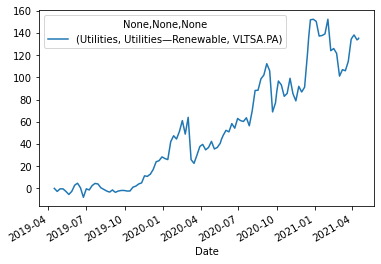

In [47]:
df_pc_pricechange.xs("VLTSA.PA", axis=1, level=2, drop_level=False).plot() # use xs to bypass levels of multiindex

<AxesSubplot:xlabel='Date'>

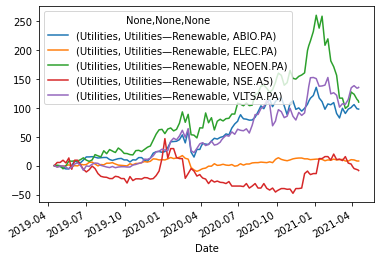

In [49]:
df_pc_pricechange.xs("Utilities—Renewable", axis=1, level=1, drop_level=False).plot() # use xs to bypass levels of multiindex

In [40]:
px.line(
    df_pc_pricechange[sector][industry],
    title=f"<i>sector:</i> {sector}<br><i>industry:</i> {industry}",
    labels={
        "value": "Performance",
        "Date":"",
#         "color":"Industry"
    },
#     color=[sector for val in range(df_pc_pricechange.resample("W").mean().shape[0])], # same color for all stocks
)

In [16]:
# Create figure
fig = go.Figure()


sectors = ["Utilities", "Communication Services", "Real Estate"]
opacity_weak = .1
opacity_strong = .4
colors = [
    f"rgba(255, 0, 0, {opacity_weak})", # red
    f"rgba(0, 0, 255, {opacity_weak})", # blue
    f"rgba(0, 255, 0, {opacity_weak})", # green
    f"rgba(255, 128, 0, {opacity_weak})", # orange
]

for sector in sectors:

    # Define data for plot
    df_plot = df_pc_pricechange.resample("W").mean()[sector]

    # Loop df columns and plot columns to the figure
    for i in df_plot.columns:
        col_name = str(i)
        fig.add_trace(go.Scatter(
                            x=df_plot.index,
                            y=df_plot[col_name],
                            mode='lines', # 'lines' or 'markers'
                            name=col_name,
#                             name=sector,
                            marker=dict(color=colors[sectors.index(sector)], size=.5,),
                            line={
                                "color":colors[sectors.index(sector)],
                                },
                            )
                     )

fig.show()

KeyError: "('Utilities—Diversified', 'EDF.PA')"

In [ ]:
# df_pc_pricechange[sector].plot(figsize=(16,9), grid=True, title=sector)

In [ ]:
ticker = "GLE.PA"

In [ ]:
# df_pc_pricechange[sector][ticker].plot(figsize=(16,9), grid=True, title=f"{ticker}\n({sector}")

In [ ]:
# px.line(df_pc_pricechange[sector][ticker])
px.line(df_pc_pricechange.resample("W").mean()[sector][ticker])